In [ ]:
!git clone https://github.com/penny4860/Yolo-digit-detector

In [1]:
# -*- coding: utf-8 -*-
import json
import cv2
from yolo.backend.utils.box import draw_scaled_boxes
import os
import yolo

C:\Users\thodo\Python 3.8\anaconda\envs\yolo\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\thodo\Python 3.8\anaconda\envs\yolo\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\thodo\Python 3.8\anaconda\envs\yolo\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\thodo\Python 3.8\anaconda\envs\yolo\l

In [2]:
from yolo.frontend import create_yolo
# 1. create yolo instance
yolo_detector = create_yolo("ResNet50", ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], 416)

[0]              
__________________________________________________________________________________________________
bn4a_branch2a (BatchNormalizati (None, 26, 26, 256)  1024        res4a_branch2a[0][0]             
__________________________________________________________________________________________________
activation_23 (Activation)      (None, 26, 26, 256)  0           bn4a_branch2a[0][0]              
__________________________________________________________________________________________________
res4a_branch2b (Conv2D)         (None, 26, 26, 256)  590080      activation_23[0][0]              
__________________________________________________________________________________________________
bn4a_branch2b (BatchNormalizati (None, 26, 26, 256)  1024        res4a_branch2b[0][0]             
__________________________________________________________________________________________________
activation_24 (Activation)      (None, 26, 26, 256)  0           bn4a_branch2b[0][0]       

In [3]:
# 2. load pretrained weighted file
# Pretrained weight file is at https://drive.google.com/drive/folders/1Lg3eAPC39G9GwVTCH3XzF73Eok-N-dER

DEFAULT_WEIGHT_FILE = os.path.join(yolo.PROJECT_ROOT, "weights.h5")


In [4]:
yolo_detector.load_weights(DEFAULT_WEIGHT_FILE)

Loading pre-trained weights in c:\Users\thodo\OneDrive\Desktop\Yolo-digit-detector-master\weights.h5


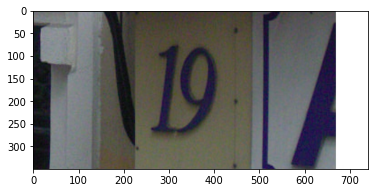

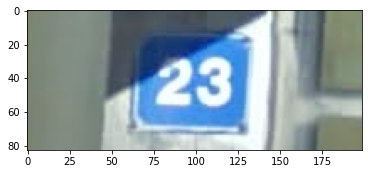

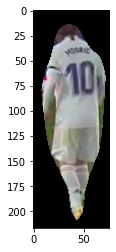

In [7]:
# 3. Load images

import os
import matplotlib.pyplot as plt
%matplotlib inline  
DEFAULT_IMAGE_FOLDER = os.path.join(yolo.PROJECT_ROOT, "tests", "dataset", "svhn", "imgs")

img_files = [os.path.join(DEFAULT_IMAGE_FOLDER, "1.png"), os.path.join(DEFAULT_IMAGE_FOLDER, "2.png"), os.path.join(DEFAULT_IMAGE_FOLDER, "3.png")]
imgs = []
for fname in img_files:
    img = cv2.imread(fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgs.append(img)
    plt.imshow(img)
    plt.show()

2-boxes are detected.


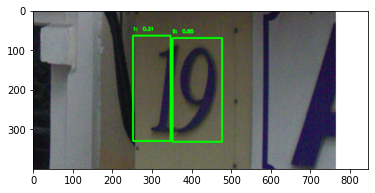

2-boxes are detected.


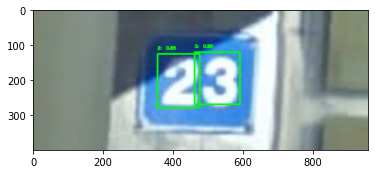

0-boxes are detected.


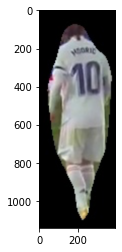

In [12]:
# 4. Predict digit region

THRESHOLD = 0.2
for img in imgs:
    boxes, probs = yolo_detector.predict(img, THRESHOLD)

    # 4. save detection result
    image = draw_scaled_boxes(img,
                              boxes,
                              probs,
                              ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])

    print("{}-boxes are detected.".format(len(boxes)))
    plt.imshow(image)
    plt.show()
